<a href="https://colab.research.google.com/github/danmiee/Python_PNU/blob/main/ch06/MissionSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# colab 한글 폰트

In [42]:
#한글 폰트 설치 : colab , 런타임 다시 시작 하기

import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [1]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

# 자동차 표시연비 크롤링

## csv

In [81]:
import usecsv
import urllib.request as ur
from bs4 import BeautifulSoup as bs

url = "https://bpms.kemco.or.kr:444/transport_2012/car/car_choice.aspx?serorigin=&serecode=&serfuel=&sergear=&sercartype=&sergrade=&sertypegb=&sertab=&otype=&ptype=500&f=system&sermileage1=&sermileage2=&serco21=&serco22=&seramt1=&seramt2=&sermname=&serstyear=#search_top"

soup = bs(ur.urlopen(url).read(), 'html.parser')

# 한 행씩 모든 데이터 가져오기
# tr_list = soup.find_all("tr")  # 다른 것 포함됨
tr_list = soup.select("#search_top > table > tbody > tr")

# type(soup)  #bs4.BeautifulSoup
# type(tr_list)  #list
# type(tr_list[0])  #bs4.element.Tag

# td = tr_list[0].find_all('td')
# print(td[0].text)
# print(td[1].text)
# print(td[2].text)
# print(td[3].text)
# print(td[4].text)
# print(td[6].text)

# 콤마 주의!!!!!
car_info = [['업체명', '모델명', '표시연비', '배기량', 'co2배출량', '등급', '연간유류비']]

for tr in tr_list:
  td = tr.find_all('td')
  img_list = td[5].find_all('img')
  car_info.append([td[0].text.replace(' ',''), 
             td[1].text, 
             td[2].text, 
             # 그래프 그리기 위해 콤마 없애주기
             td[3].text.replace(',',''), 
             td[4].text, 
             img_list[0].get('src')[-5],
             # 그래프 그리기 위해 콤마 없애주기
             td[6].text.replace(',','')])

usecsv.writecsv('car_info.csv', car_info)


## 데이터 프레임

In [82]:
import pandas as pd
df = pd.read_csv('car_info.csv')
df.head()

,업체명,모델명,표시연비,배기량,co2배출량,등급,연간유류비
0,스텔란티스코리아주식회사,Peugeot 2008 1.5 BlueHDi,17.1,1499,109,1,1043553
1,한국토요타자동차㈜,토요타 Camry Hybrid,17.1,2487,91,1,1211746
2,르노코리아자동차주식회사,XM3 하이브리드 17인치,17.4,1598,91,1,1190853
3,르노코리아자동차주식회사,XM3 하이브리드 18인치,17.0,1598,93,1,1218874
4,한국토요타자동차㈜,렉서스 ES300h,16.8,2487,94,1,1233384


### 원하는 데이터로 column 추가

  - 국산차 / 수입차 분류

In [85]:
# 원하는 column의 요소를 중복값없이 가져오기
df['업체명'].unique()

array(['스텔란티스코리아주식회사', '한국토요타자동차㈜', '르노코리아자동차주식회사', '폭스바겐그룹코리아주식회사',
       '현대자동차㈜', '기아주식회사', '쌍용자동차주식회사', '혼다코리아(주)', '메르세데스-벤츠코리아(주)',
       '한국지엠주식회사', 'BMW코리아㈜', '크라이슬러복사본', '엠엠에스케이(주)'], dtype=object)

In [86]:
df['구분'] = ['국산' if item in ['르노코리아자동차주식회사', '현대자동차㈜', '기아주식회사', '쌍용자동차주식회사'] else '수입' for item in list(df['업체명'])]
df.head()

,업체명,모델명,표시연비,배기량,co2배출량,등급,연간유류비,구분
0,스텔란티스코리아주식회사,Peugeot 2008 1.5 BlueHDi,17.1,1499,109,1,1043553,수입
1,한국토요타자동차㈜,토요타 Camry Hybrid,17.1,2487,91,1,1211746,수입
2,르노코리아자동차주식회사,XM3 하이브리드 17인치,17.4,1598,91,1,1190853,국산
3,르노코리아자동차주식회사,XM3 하이브리드 18인치,17.0,1598,93,1,1218874,국산
4,한국토요타자동차㈜,렉서스 ES300h,16.8,2487,94,1,1233384,수입


## 그래프 전처리

  - 그래프로 그리기 위해서는 수치값이 필요함(문자X)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   업체명     500 non-null    object 
 1   모델명     500 non-null    object 
 2   표시연비    500 non-null    float64
 3   배기량     500 non-null    int64  
 4   co2배출량  500 non-null    int64  
 5   등급      500 non-null    int64  
 6   연간유류비   500 non-null    int64  
 7   구분      500 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 31.4+ KB


In [88]:
# td[3].text  #'1,968' : 콤마 때문에 문자로 인식됨
# 콤마 없애는 법
td[3].text.replace(',','')

'2151'

In [89]:
df[df['co2배출량']>=110]

,업체명,모델명,표시연비,배기량,co2배출량,등급,연간유류비,구분
5,스텔란티스코리아주식회사,Peugeot 5008 1.5 BlueHDi,16.1,1499,116,1,1108370,수입
6,스텔란티스코리아주식회사,DS4 Crossback 1.5 BlueHDi,16.5,1499,113,1,1081500,수입
7,폭스바겐그룹코리아주식회사,T-Roc,16.4,1968,114,1,1088095,수입
8,스텔란티스코리아주식회사,DS4 Crossback 1.5 BlueHDi,16.2,1499,115,1,1101528,수입
9,폭스바겐그룹코리아주식회사,Q2 35 TDI,16.7,1968,111,1,1068548,수입
...,...,...,...,...,...,...,...,...
495,현대자동차㈜,GV70 2.2디젤 2WD 18인치 (빌트인캠)(22),13.5,2151,141,3,1321833,국산
496,기아주식회사,스포티지 2.0디젤 4WD 8AT 19인치 (빌트인캠),12.4,1998,155,3,1439093,국산
497,기아주식회사,쏘렌토 2.2디젤 2WD 6인 20인치타이어(22),14.0,2151,135,3,1274625,국산
498,현대자동차㈜,GV70 2.2디젤 2WD 18인치(22),13.6,2151,140,3,1312114,국산


In [90]:
df[(df['co2배출량']>=110) & (df['표시연비']>16.3)]

,업체명,모델명,표시연비,배기량,co2배출량,등급,연간유류비,구분
6,스텔란티스코리아주식회사,DS4 Crossback 1.5 BlueHDi,16.5,1499,113,1,1081500,수입
7,폭스바겐그룹코리아주식회사,T-Roc,16.4,1968,114,1,1088095,수입
9,폭스바겐그룹코리아주식회사,Q2 35 TDI,16.7,1968,111,1,1068548,수입
32,폭스바겐그룹코리아주식회사,A4 35 TDI,16.9,1968,110,1,1055902,수입
40,기아주식회사,"셀토스 1.6디젤 2WD 17"" 타이어 (21)",16.7,1598,111,1,1068548,국산
42,폭스바겐그룹코리아주식회사,T-Roc 2.0TDI,16.5,1968,112,1,1081500,수입
64,현대자동차㈜,"코나 1.6디젤 2WD (18"" 타이어)",16.8,1598,110,1,1062188,국산
75,기아주식회사,"셀토스 1.6디젤 2WD (18""타이어)",16.4,1598,113,1,1088095,국산
84,기아주식회사,"스토닉 1.6디젤 7DCT 19MY (17"" 타이어) (15)",16.7,1582,111,1,1068548,국산
88,BMW코리아㈜,MINI Cooper D Five Door,16.5,1496,113,1,1081500,수입


이미지 가져오기

In [91]:
# ResultSet 안의 요소로 이미지가 들어가있음
img_list = td[5].find_all('img')
# <img id="list_RT__ctl99_ico_img" src="../images/ico/1.gif"/>
# 파일명이 등급과 일치하는 것으로 확인되어 src의 인덱스로 가져옴
img = img_list[0].get('src')[-5]

## matplotlib 으로 그래프 그리기

  - 데이터에 따라 달라지는 그래프 그리기

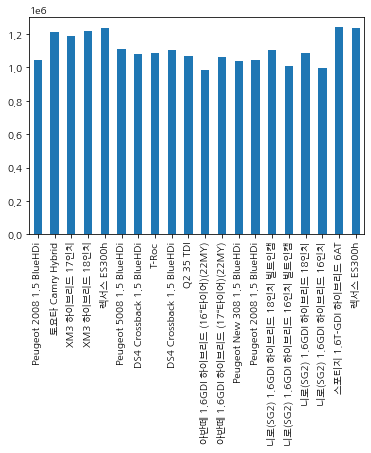

In [68]:
import matplotlib.pyplot as plt
df['연간유류비'].head(20).plot(kind='bar')
plt.xticks(range(20), labels=df['모델명'].head(20), rotation=90)
plt.show()

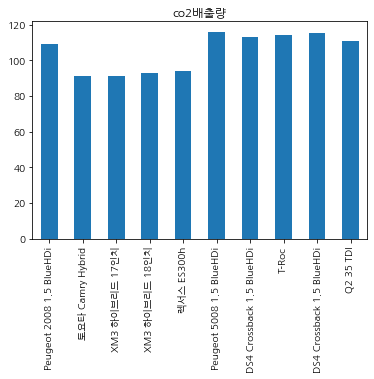

In [69]:
df['co2배출량'].head(10).plot(kind='bar')
plt.title('co2배출량')
plt.xticks(range(10), labels=df['모델명'].head(10), rotation=90)
plt.show()

## seaborn 으로 그래프 그리기

  - matplotlib보다 이쁨

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   업체명     100 non-null    object 
 1   모델명     100 non-null    object 
 2   표시연비    100 non-null    float64
 3   배기량     100 non-null    int64  
 4   co2배출량  100 non-null    int64  
 5   등급      100 non-null    int64  
 6   연간유류비   100 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.6+ KB


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

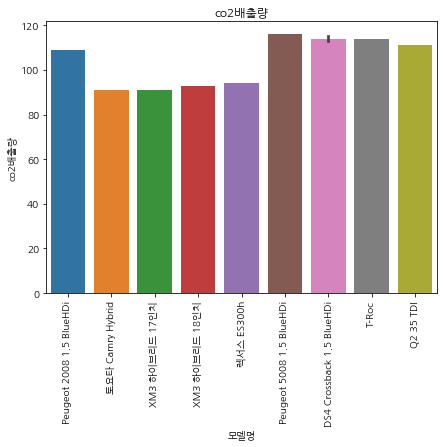

In [30]:
import seaborn as sns

plt.figure(figsize=(7,5))
# 바형 그래프
sns.barplot(x='모델명', y='co2배출량', data=df.head(10))
plt.title('co2배출량')
plt.xticks(rotation=90)


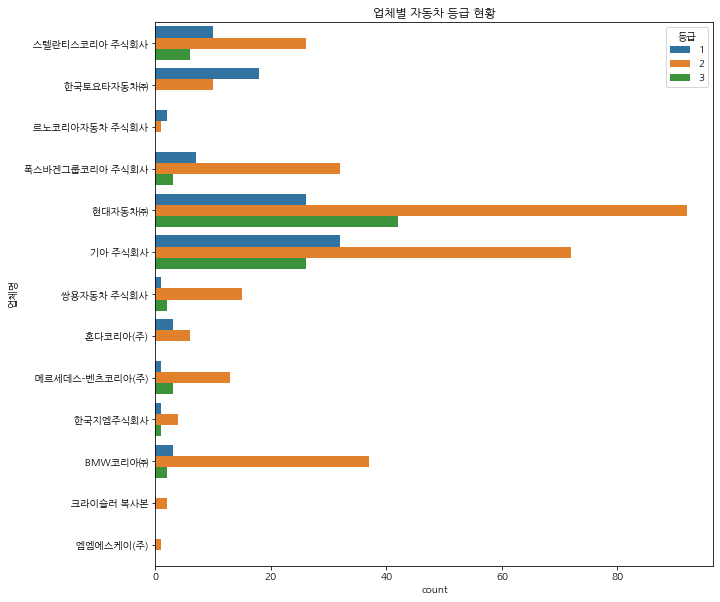

In [36]:
plt.figure(figsize=(10,10))
# 데이터 수 그래프 / hue : 그룹화
sns.countplot(y='업체명', hue='등급', data=df)
plt.title('업체별 자동차 등급 현황')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


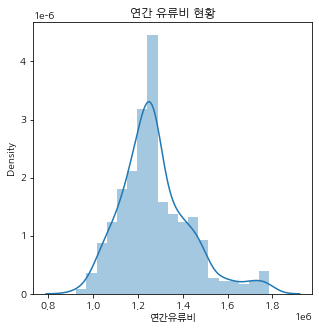

In [67]:
plt.figure(figsize=(5,5))
# 히스토그램 + 분포도
# sns.displot(df['연간유류비'])
# sns.kdeplot(df['연간유류비'])
sns.distplot(df['연간유류비'])
plt.title('연간 유류비 현황')
plt.show()

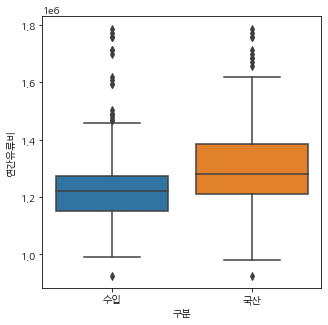

In [54]:
plt.figure(figsize=(5,5))
# 표시되는 값 : 최솟값, 사분위, 이상치
## 1사분위 : 전체의 25%
## 2사분위 : 전체의 50%
## 3사분위 : 전체의 75%
## 4사분위(최댓값) : 3사분위에서 일정 비율로 찍은 값
## 이상치 : 최댓값보다 더 높은 값
sns.boxplot(x='구분', y='연간유류비', data=df)
plt.show()